**Step 1:** Load the data


In [19]:
import pandas as pd
import numpy as np

# --- Step 1: Load the Data ---
link='/content/drive/MyDrive/MLAI Py/Portfolio 1/bank-full.csv'
df = pd.read_csv(link, sep=";")
print("--- Successfully loaded bank-full.csv ---")
df.head()

--- Successfully loaded bank-full.csv ---


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**Step 2:** Data Preprocessing

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

print("--- Step 2: Starting Data Preprocessing  ---")

# a. Separate Target (y) from Features (X)
target_col = 'housing'
X = df.drop(target_col, axis=1)
y = df[target_col]

print(f"   - Target variable 'y' is: {target_col}")

# b. Encode Target Variable
y = y.map({'yes': 1, 'no': 0})
print("   - Converted target 'y' (housing) to 1s and 0s.")

# c. Encode 'yes'/'no' Features
X['default'] = X['default'].map({'yes': 1, 'no': 0})
X['loan'] = X['loan'].map({'yes': 1, 'no': 0})
X['y'] = X['y'].map({'yes': 1, 'no': 0}) # 'y' is our feature
print("   - Converted binary features (default, loan, y) to 1s and 0s.")

# d. One-Hot Encoding
# This converts 'job', 'marital', etc., into dummy columns
X_encoded = pd.get_dummies(X, drop_first=True)
print(f"   - Converted categorical features to dummies. Features changed from {X.shape[1]} to {X_encoded.shape[1]}.")

# e. Split the Data
X_train_encoded, X_test_encoded, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42
)
print(f"   - Data split into 80% train ({X_train_encoded.shape[0]} rows) and 20% test ({X_test_encoded.shape[0]} rows).")

# f. Scale the Data
scaler = StandardScaler()

# 1. FIT and TRANSFORM the training data
X_train_scaled = scaler.fit_transform(X_train_encoded)

# 2. ONLY TRANSFORM the test data
X_test_scaled = scaler.transform(X_test_encoded)

# Also save the feature names for our analysis later
feature_names = X_encoded.columns

print("   - Applied StandardScaler. Fit on train, transformed both train and test.")
print("\n---  Preprocessing Complete ---")
print("Ready variables: X_train_scaled, X_test_scaled, y_train, y_test")

--- Step 2: Starting Data Preprocessing  ---
   - Target variable 'y' is: housing
   - Converted target 'y' (housing) to 1s and 0s.
   - Converted binary features (default, loan, y) to 1s and 0s.
   - Converted categorical features to dummies. Features changed from 16 to 42.
   - Data split into 80% train (36168 rows) and 20% test (9043 rows).
   - Applied StandardScaler. Fit on train, transformed both train and test.

---  Preprocessing Complete ---
Ready variables: X_train_scaled, X_test_scaled, y_train, y_test


**Step 3:** Model Training

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_recall_fscore_support

print("--- Step 3: Starting Model Training ---")

# a. Define the Models
model_lr = LogisticRegression(random_state=42, class_weight='balanced', max_iter=1000)
model_rf = RandomForestClassifier(random_state=42, class_weight='balanced')

# b. Train the Models
print("   - Training Logistic Regression model...")
model_lr.fit(X_train_scaled, y_train)

print("   - Training Random Forest model...")
model_rf.fit(X_train_scaled, y_train)

print("...Training Complete!")

# c. Get Predictions
print("\n--- Generating Predictions ---")
y_pred_lr = model_lr.predict(X_test_scaled)
y_pred_rf = model_rf.predict(X_test_scaled)

# d. Get Evaluation Metrics
print("\n--- Logistic Regression Results ---")
print(classification_report(y_test, y_pred_lr, target_names=['No Housing Loan (0)', 'Has Housing Loan (1)']))

print("\n--- Random Forest Results ---")
print(classification_report(y_test, y_pred_rf, target_names=['No Housing Loan (0)', 'Has Housing Loan (1)']))

# e. Store Metrics for Report Table
metrics_lr = precision_recall_fscore_support(y_test, y_pred_lr, average='weighted')
accuracy_lr = accuracy_score(y_test, y_pred_lr)

metrics_rf = precision_recall_fscore_support(y_test, y_pred_rf, average='weighted')
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Create a DataFrame to display the results clearly
results_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_rf],
    'Precision (Weighted)': [metrics_lr[0], metrics_rf[0]],
    'Recall (Weighted)': [metrics_lr[1], metrics_rf[1]],
    'F1-Score (Weighted)': [metrics_lr[2], metrics_rf[2]]
})

print("\n--- Summary Table for Report ---")
print(results_df.to_string(index=False, float_format='{:.4f}'.format))

--- Step 3: Starting Model Training ---
   - Training Logistic Regression model...
   - Training Random Forest model...
...Training Complete!

--- Generating Predictions ---

--- Logistic Regression Results ---
                      precision    recall  f1-score   support

 No Housing Loan (0)       0.70      0.78      0.74      4048
Has Housing Loan (1)       0.81      0.73      0.77      4995

            accuracy                           0.75      9043
           macro avg       0.75      0.76      0.75      9043
        weighted avg       0.76      0.75      0.76      9043


--- Random Forest Results ---
                      precision    recall  f1-score   support

 No Housing Loan (0)       0.76      0.77      0.77      4048
Has Housing Loan (1)       0.81      0.80      0.81      4995

            accuracy                           0.79      9043
           macro avg       0.79      0.79      0.79      9043
        weighted avg       0.79      0.79      0.79      9043


--- Sum

**Step 4:** Feature Importance

In [22]:
print("--- Finding Key Drivers (Feature Importances) ---")

# 1. Get the feature importances from the trained Random Forest model
importances = model_rf.feature_importances_

# 2. Create a DataFrame to hold the feature names and their scores
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# 3. Sort the DataFrame to find the most important features
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# 4. Print the Top 10 features
print("\n--- Top 10 Key Drivers for Predicting 'Housing Loan' ---")
print(feature_importance_df.head(10).to_string(index=False, float_format='{:.4f}'.format))

--- Finding Key Drivers (Feature Importances) ---

--- Top 10 Key Drivers for Predicting 'Housing Loan' ---
        Feature  Importance
      month_may      0.1248
            age      0.1196
        balance      0.1195
       duration      0.1157
            day      0.1072
       campaign      0.0547
      month_aug      0.0481
          pdays      0.0364
contact_unknown      0.0249
           loan      0.0164


**Step 5:** Plot feature importance

--- 📊 Generating Key Drivers Bar Chart ---


/tmp/ipython-input-2100693249.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


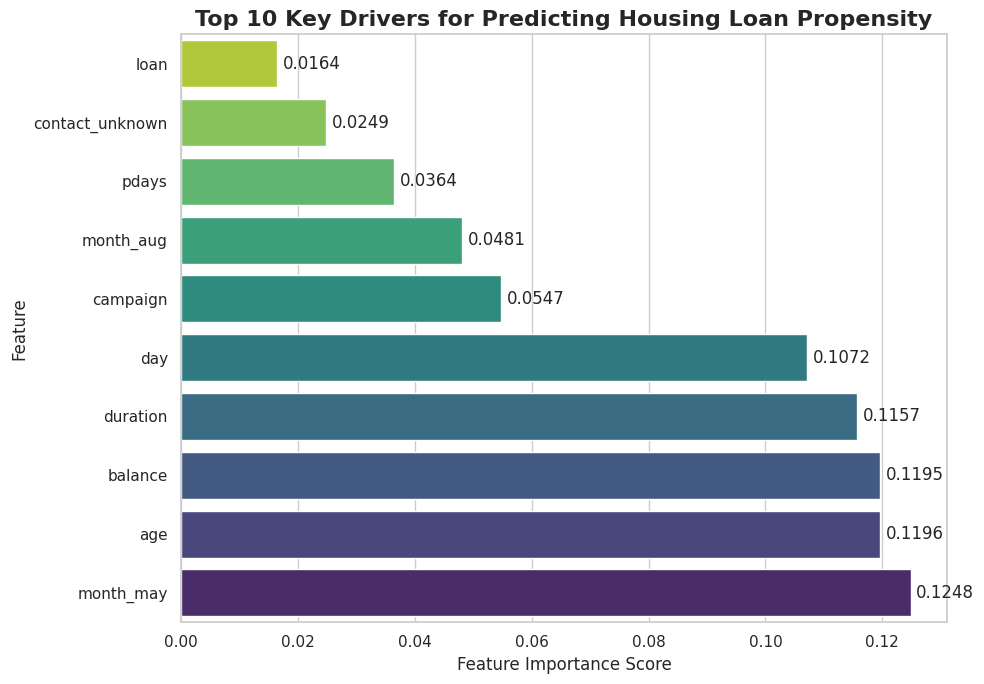

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

print("--- 📊 Generating Key Drivers Bar Chart ---")

# Re-create the feature_importance_df

importances = model_rf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)


# Select Top 10 Features
top_10_features = feature_importance_df.head(10)

# Create the Plot
plt.figure(figsize=(10, 7))
sns.set_theme(style="whitegrid")

# Create the horizontal bar plot
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=top_10_features,
    palette='viridis'
)

# Add title and labels
ax.set_title('Top 10 Key Drivers for Predicting Housing Loan Propensity', fontsize=16, weight='bold')
ax.set_xlabel('Feature Importance Score', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)

# Invert y-axis to show the most important feature at the top
plt.gca().invert_yaxis()

# Add data labels (the importance values) to the bars
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 0.001,
            p.get_y() + p.get_height() / 2.,
            f'{width:.4f}',
            ha='left',
            va='center')

plt.tight_layout()

# Save the Plot
chart_filename = 'feature_importance_chart.png'
plt.savefig(chart_filename)

**Step 6:** Confusion Matrix of the Model

--- 📊 Generating Confusion Matrix ---


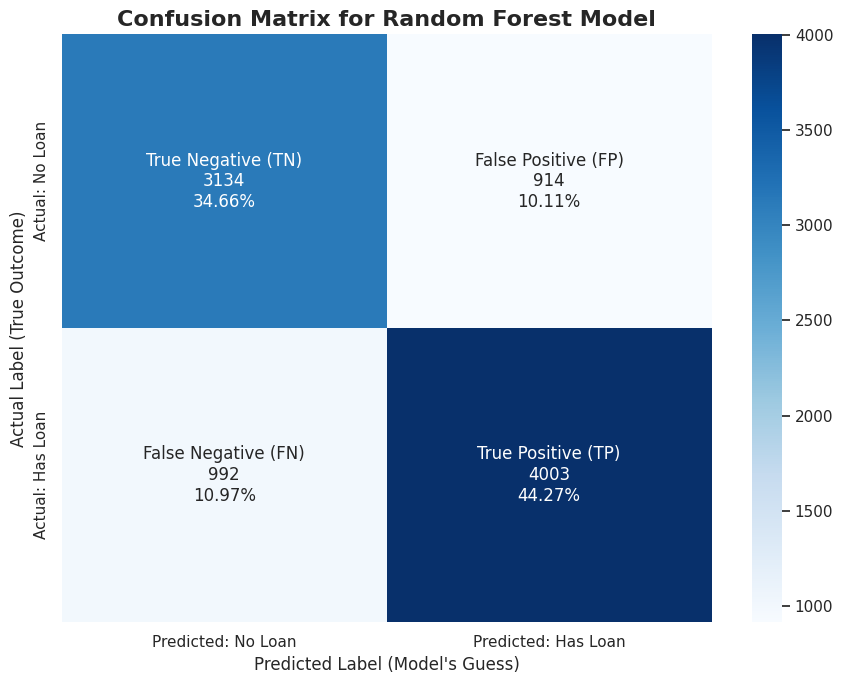

In [24]:
from sklearn.metrics import confusion_matrix

print("--- 📊 Generating Confusion Matrix ---")

# 1. Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)

# 2. Create detailed labels for each quadrant
group_names = ['True Negative (TN)', 'False Positive (FP)', 'False Negative (FN)', 'True Positive (TP)']
group_counts = [f"{value}" for value in cm.flatten()]
group_percentages = [f"{value:.2%}" for value in cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names, group_counts, group_percentages)]
labels = np.asarray(labels).reshape(2,2)

# 3. Create the plot
plt.figure(figsize=(9, 7))
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues',
            xticklabels=['Predicted: No Loan', 'Predicted: Has Loan'],
            yticklabels=['Actual: No Loan', 'Actual: Has Loan'])
plt.title('Confusion Matrix for Random Forest Model', fontsize=16, weight='bold')
plt.ylabel('Actual Label (True Outcome)', fontsize=12)
plt.xlabel('Predicted Label (Model\'s Guess)', fontsize=12)
plt.tight_layout()

# 4. Save the plot
cm_filename = 'confusion_matrix.png'
plt.savefig(cm_filename)